# Compare Rayleigh scattering given by getObsAtmo with the analytical model
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2025/11/17
- last update : 2025/10/17 : getObsAtmo version 0.2.2 with atmatmosphericmodels

This emulator is based from datagrid of atmospheric transparencies extracted from libradtran

**Goal** : Compare Rayleigh scattering in getObsAtmo (libRadtran) with analytical model

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [3]:
import getObsAtmo
from getObsAtmo.getObsAtmo import ObsAtmo,Dict_Of_sitesAltitudes
from atmanalyticalmodels import libatmscattering as atm

## Check information

### getObsAtmo version

In [4]:
print(f"{getObsAtmo.__name__} version {getObsAtmo._version.__version__}")

getObsAtmo version 0.2.2


In [5]:
the_version = getObsAtmo._version.__version__

In [6]:
obssitename = "LSST"
altitude = Dict_Of_sitesAltitudes[obssitename]
lsst_pressure = 740.0 # hPa
emul =  ObsAtmo(obs_str= obssitename,pressure = lsst_pressure)

# Typical transmission plot

- show a typical transmission plot

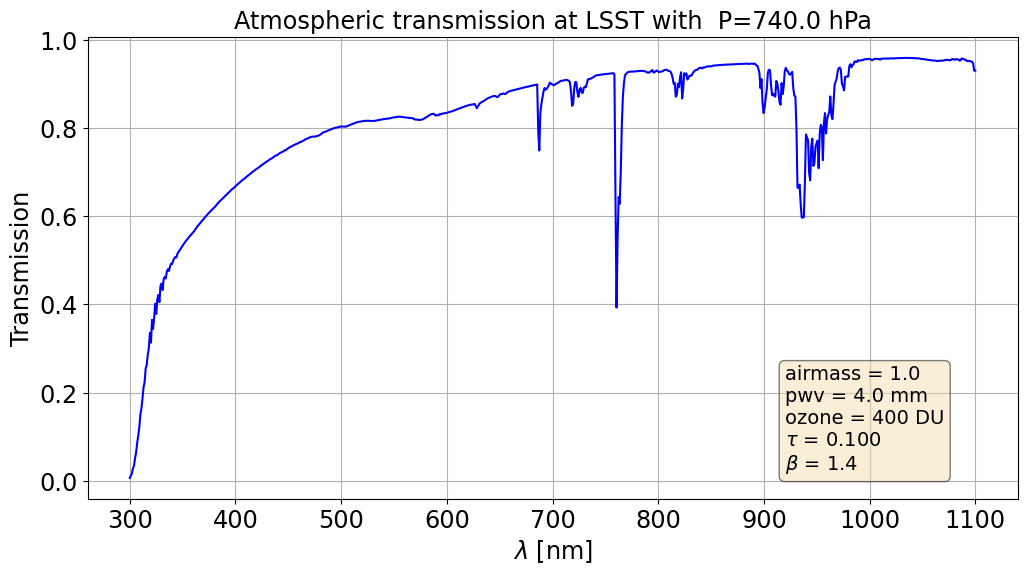

In [7]:
emul.plot_transmission()

# Setting atmospheric parameters

In [8]:
WL = emul.GetWL()
WLMIN = WL.min()
WLMAX = WL.max()
WL = np.arange(WLMIN ,WLMAX,50)

AMMIN = emul.AIRMASS.min()
AMMAX = emul.AIRMASS.max()
airmasses = np.arange(AMMIN, AMMAX,0.2)
NAM = len(airmasses)
pwvs = emul.PWV
NPWV = len(pwvs)
ozs = emul.OZ
NOZ = len(ozs)

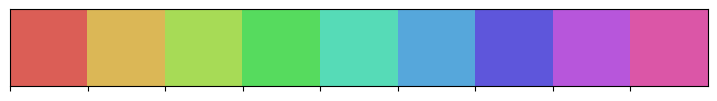

In [9]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

## Check emulator with Rayleigh scattering

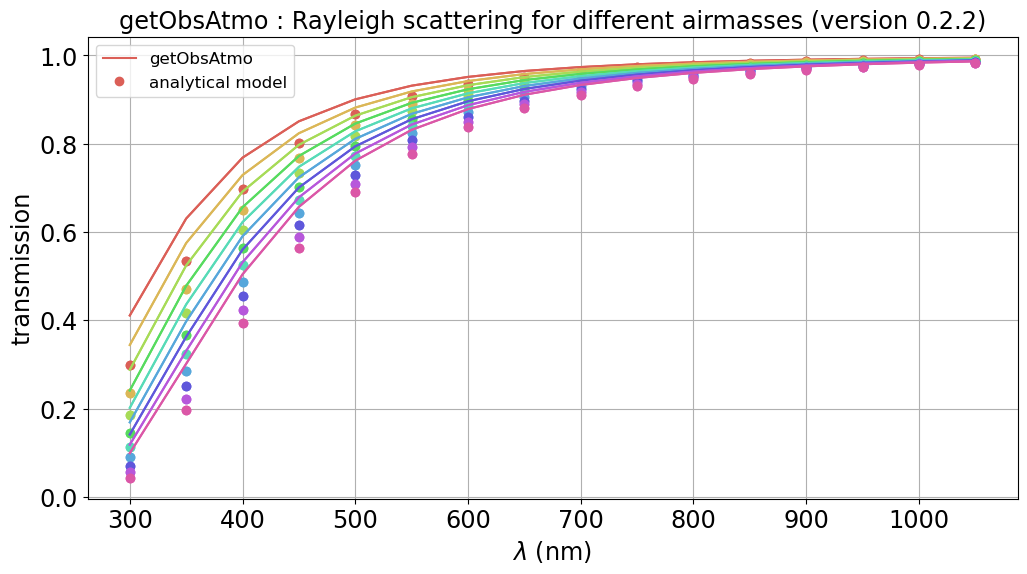

In [10]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    #calculate with getObsAtmo
    transm = emul.GetRayleighTransparencyArray(WL,am)
    ax.plot(WL,transm,"-",color=hls_colors[idx])
    # calculate 
    OD=atm.RayOptDepth_adiabatic(WL, altitude=altitude, costh=1./am)
    transm_anal = np.exp(-OD)
    ax.plot(WL,transm_anal,"o",color=hls_colors[idx])

    if idx == 0:
        ax.plot(WL,transm,"-",color=hls_colors[idx],label="getObsAtmo")
        ax.plot(WL,transm_anal,"o",color=hls_colors[idx],label="analytical model")
    else:
        ax.plot(WL,transm,"-",color=hls_colors[idx])
        ax.plot(WL,transm_anal,"o",color=hls_colors[idx])
        
title = f"{getObsAtmo.__name__} : Rayleigh scattering for different airmasses (version {the_version})"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")

ax.grid()
ax.legend()
plt.show()


- There is a bias between the analytical model and getObsAtmo (libradtran)